In [53]:
import pandas as pd
from pandas.tools.plotting import scatter_matrix
from sklearn import metrics
import matplotlib.pyplot as plt
from sklearn import cross_validation
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
#from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.preprocessing import Normalizer
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.datasets import make_classification
from sklearn.cross_validation import cross_val_predict
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
from pylab import rcParams
import os
# plot feature importance using built-in function
from numpy import loadtxt
from matplotlib import pyplot
%matplotlib inline
from sklearn.multiclass import OneVsRestClassifier
from scipy import interp
from sklearn import svm, datasets
from sklearn.metrics import roc_curve, auc

In [54]:
os.chdir("C://Users//rumer//Desktop//8May2017//DataSet")

In [58]:
df=pd.read_csv("w1-two.csv")
df.columns

Index([u'anon_screen_name', u'QuzAttmptAvg1', u'QuzCount1', u'QuzAvSco1',
       u'QuzLagMean1', u'LecLag1', u'LecCount1', u'VidActCount1', u'eff1',
       u'Finalgrade', u'FinalScore', u'Class', u'EngStatus'],
      dtype='object')

In [61]:
dem=pd.read_csv("demo.csv")


In [64]:
f=pd.get_dummies(dem['gender'])
f.columns=['No-gender','Female','Male']

In [65]:
f.head()

,No-gender,Female,Male
0,0,0,0
1,0,0,0
2,0,0,0
3,0,0,0
4,0,0,1


In [28]:
df=pd.merge(dem,df,on='anon_screen_name')

In [29]:
df.head()

,anon_screen_name,gender,year_of_birth,level_of_education,country_three_letters,country_name,QuzAttmptAvg1,QuzCount1,QuzAvSco1,QuzLagMean1,LecLag1,LecCount1,VidActCount1,eff1,Finalgrade,FinalScore,Class,EngStatus
0,13641bfecade7ce327bbd9f3741cc7d89a23f535,0,1970,User withheld,USA,United States,0,0,0,0,0,12.5,0,0,0.0,Fail,NotEngaged,Time<10Mins
1,6477a9db4f10c1f2cd6c6ed915994fecab250301,0,\N,User withheld,USA,United States,0,0,0,0,0,0.0,1,157,0.0,Fail,NotEngaged,Time<10Mins
2,6477a9db4f10c1f2cd6c6ed915994fecab250301,0,\N,User withheld,DEU,Germany,0,0,0,0,0,0.0,1,157,0.0,Fail,NotEngaged,Time<10Mins
3,6477a9db4f10c1f2cd6c6ed915994fecab250301,0,\N,User withheld,ZZZ,Reserved,0,0,0,0,0,0.0,1,157,0.0,Fail,NotEngaged,Time<10Mins
4,dc81f20b60e34ad25addc0fe50ae53b380bd84de,m,1981,Bachelors,USA,United States,0,0,0,0,0,0.0,9,7904,0.1,Fail,Engaged,Time<30Mins


In [30]:
df.drop('Finalgrade',1, inplace=True)
df.drop('EngStatus',1, inplace=True)
df.drop('Class',1,inplace=True)
df.drop('country_name',1,inplace=True)

In [31]:
df.columns

Index([u'anon_screen_name', u'gender', u'year_of_birth', u'level_of_education',
       u'country_three_letters', u'QuzAttmptAvg1', u'QuzCount1', u'QuzAvSco1',
       u'QuzLagMean1', u'LecLag1', u'LecCount1', u'VidActCount1', u'eff1',
       u'FinalScore'],
      dtype='object')

In [32]:
array=df.values
X = array[:,1:13]
y = array[:,13]


In [64]:
#from sklearn.preprocessing import LabelBinarizer
#lb = LabelBinarizer()
#y = np.array([number[0] for number in lb.fit_transform(y)])


In [33]:
scaler = Normalizer().fit(X)
normalizedX = scaler.transform(X)
X=normalizedX

ValueError: could not convert string to float: USA

In [34]:
validation_size = 0.20
print("Number of records", len(X))
print("Class Distribuition", df.groupby('FinalScore').size())
#plt.plot(df['ActCount-1'])


('Number of records', 13462)
('Class Distribuition', FinalScore
Fail    11299
Pass     2163
dtype: int64)


In [35]:
seed = 7
X_train, X_test, Y_train, y_test = cross_validation.train_test_split(X, y, test_size=validation_size, random_state=seed)

In [36]:
# Test options and evaluation metric
num_folds = 10
num_instances = len(X_train)
seed = 7
scoring = 'accuracy'
models=[]
models.append(('LR',LogisticRegression()))
models.append(('DTree', DecisionTreeClassifier()))
#models.append(('LDA',LinearDiscriminaantAnalysis()))
models.append(('KNN',KNeighborsClassifier()))
models.append(('CART',DecisionTreeClassifier()))
models.append(('NB',GaussianNB()))
models.append(('SVM',SVC()))
#Evaluate each model
results=[]
names=[]
for name, model in models:
    kfold = cross_validation.KFold(n=num_instances, n_folds=num_folds, random_state=seed)
    cv_results = cross_validation.cross_val_score(model, X_train, Y_train, cv=kfold, scoring=scoring)
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean()*100, cv_results.std())
    print(msg)
    # Compare Algorithms

ValueError: could not convert string to float: RUS

IndexError: list index out of range

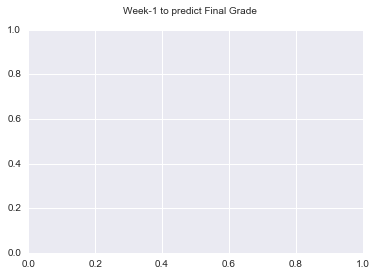

In [37]:
fig = plt.figure()
fig.suptitle('Week-1 to predict Final Grade')
ax = fig.add_subplot(111)
plt.boxplot(results)
plt.ylabel("F1-Score")
plt.xlabel("Classifiers")
ax.set_xticklabels(names)
plt.show()

In [29]:
# Make predictions on validation dataset
# -*- coding: utf-8 -*-
print("Decision Tree")
LR = DecisionTreeClassifier()
LR.fit(X_train, Y_train)
predictions = LR.predict(X_test)
print(accuracy_score(y_test, predictions))
print(confusion_matrix(y_test, predictions))
print(classification_report(y_test, predictions))



Decision Tree
0.846081208687
[[1772  113]
 [ 213   20]]
             precision    recall  f1-score   support

       Fail       0.89      0.94      0.92      1885
       Pass       0.15      0.09      0.11       233

avg / total       0.81      0.85      0.83      2118



In [30]:
print("GaussianNB")
LR = GaussianNB()
LR.fit(X_train, Y_train)
predictions = LR.predict(X_test)
print(accuracy_score(y_test, predictions))
print(confusion_matrix(y_test, predictions))
print(classification_report(y_test, predictions))


GaussianNB
0.111898016997
[[   4 1881]
 [   0  233]]
             precision    recall  f1-score   support

       Fail       1.00      0.00      0.00      1885
       Pass       0.11      1.00      0.20       233

avg / total       0.90      0.11      0.03      2118



In [31]:
print("KNeighbors")
LR = KNeighborsClassifier()
LR.fit(X_train, Y_train)
predictions = LR.predict(X_test)
print(accuracy_score(y_test, predictions))
print(confusion_matrix(y_test, predictions))
print(classification_report(y_test, predictions))


KNeighbors
0.874881964117
[[1842   43]
 [ 222   11]]
             precision    recall  f1-score   support

       Fail       0.89      0.98      0.93      1885
       Pass       0.20      0.05      0.08       233

avg / total       0.82      0.87      0.84      2118



In [32]:
print("LogisticRegression")
LR = LogisticRegression()
LR.fit(X_train, Y_train)
predictions = LR.predict(X_test)
print(accuracy_score(y_test, predictions))
print(confusion_matrix(y_test, predictions))
print(classification_report(y_test, predictions))


LogisticRegression
0.889990557129
[[1885    0]
 [ 233    0]]
             precision    recall  f1-score   support

       Fail       0.89      1.00      0.94      1885
       Pass       0.00      0.00      0.00       233

avg / total       0.79      0.89      0.84      2118



C:\Users\rumer\Downloads\WinPython-64bit-2.7.10.3\python-2.7.10.amd64\lib\site-packages\sklearn\metrics\classification.py:958: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [74]:
print("Support Vector Machine")
LR = SVC()
LR.fit(X_train, Y_train)
predictions = LR.predict(X_test)
print(accuracy_score(y_test, predictions))
print(confusion_matrix(y_test, predictions))
print(classification_report(y_test, predictions))


Support Vector Machine
0.670915958451
[[794  67]
 [630 627]]
             precision    recall  f1-score   support

    Engaged       0.56      0.92      0.69       861
 NotEngaged       0.90      0.50      0.64      1257

avg / total       0.76      0.67      0.66      2118



# RAndom fores t

In [33]:
from pandas import Series, DataFrame
import pandas as pd
import numpy as np
import seaborn as sns
import sklearn.cross_validation
import os
from sklearn.cross_validation import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report
import sklearn.metrics
 # Feature Importance
from sklearn import datasets
from matplotlib import pyplot as plt
from sklearn.ensemble import ExtraTreesClassifier


In [34]:
os.chdir("C://Users//rumer//Desktop//8May2017//DataSet")

In [36]:
df=pd.read_csv("W1.csv")
df.columns

Index([u'anon_screen_name', u'QuzAttmptAvg1', u'QuzCount1', u'QuzAvSco1',
       u'QuzLagMean1', u'LecLag1', u'LecCount1', u'VidActCount1', u'eff1',
       u'Finalgrade', u'FinalScore', u'Class', u'EngStatus'],
      dtype='object')

In [37]:
df.drop('Finalgrade',1, inplace=True)
df.drop('EngStatus',1, inplace=True)
df.drop('Class',1,inplace=True)

In [38]:
predictors=df[['QuzAttmptAvg1', 'QuzCount1', 'QuzAvSco1',
       'QuzLagMean1', 'LecLag1', 'LecCount1', 'VidActCount1', 'eff1']]
X=predictors.as_matrix()

In [39]:
targets=df.FinalScore
Y=np.asarray(targets)

In [40]:
pred_train,pred_test,tar_train,tar_test=train_test_split(predictors,targets,test_size=.4)

In [41]:
pred_train.shape
pred_test.shape
tar_train.shape
tar_test.shape

(4236L,)

In [42]:
from sklearn.ensemble import RandomForestClassifier
classifier=RandomForestClassifier(n_estimators=25)
classifier=classifier.fit(pred_train,tar_train)

In [43]:
predictions=classifier.predict(pred_test)

In [44]:
sklearn.metrics.confusion_matrix(tar_test,predictions)

array([[3660,  143],
       [ 369,   64]])

In [45]:
sklearn.metrics.accuracy_score(tar_test,predictions)

0.8791312559017942

In [46]:
print(classification_report(tar_test,predictions))

             precision    recall  f1-score   support

       Fail       0.91      0.96      0.93      3803
       Pass       0.31      0.15      0.20       433

avg / total       0.85      0.88      0.86      4236



In [47]:
trees=range(25)
accuracy=np.zeros(25)
for idx in range(len(trees)):
    classifier=RandomForestClassifier(n_estimators=idx+1)
    classifier=classifier.fit(pred_train,tar_train)
    predictions=classifier.predict(pred_test)
    accuracy[idx]=sklearn.metrics.accuracy_score(tar_test,predictions)

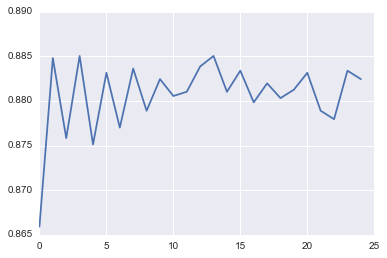

In [48]:
plt.cla()
plt.plot(trees,accuracy)
plt.show()

# Feature Importance


In [49]:
from pandas import Series, DataFrame
import pandas as pd
import numpy as np
import seaborn as sns
import sklearn.cross_validation
import os
from sklearn.cross_validation import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report
import sklearn.metrics
 # Feature Importance
from sklearn import datasets
from matplotlib import pyplot as plt
from sklearn.ensemble import ExtraTreesClassifier

In [50]:
os.chdir("C://Users//rumer//Desktop//8May2017//DataSet")

In [51]:
df=pd.read_csv("W1.csv")
df.columns

Index([u'anon_screen_name', u'QuzAttmptAvg1', u'QuzCount1', u'QuzAvSco1',
       u'QuzLagMean1', u'LecLag1', u'LecCount1', u'VidActCount1', u'eff1',
       u'Finalgrade', u'FinalScore', u'Class', u'EngStatus'],
      dtype='object')

In [52]:
d=df[['QuzAttmptAvg1', 'QuzCount1', 'QuzAvSco1',
       'QuzLagMean1', 'LecLag1', 'LecCount1', 'VidActCount1','eff1']]
X=d.as_matrix()

In [54]:
targets=df.FinalScore
Y=np.asarray(targets)

In [55]:
from matplotlib import pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier
from sklearn.cross_validation import cross_val_score
scores=[]
for val in range(1,41):
    clf=RandomForestClassifier(n_estimators=val)
    Validated=cross_val_score(clf,X,Y,cv=10)
    scores.append(Validated)
type(scores)

list

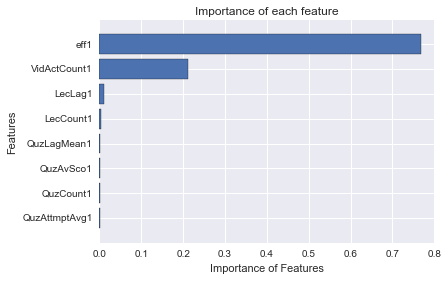

In [56]:
clf=RandomForestClassifier(n_estimators=25)
clf.fit(X,Y)
imp=clf.feature_importances_
names=d.columns

imp,names=zip(*sorted(zip(imp,names)))
plt.barh(range(len(names)),imp,align='center')
plt.yticks(range(len(names)),names)
plt.xlabel('Importance of Features')
plt.ylabel('Features')
plt.title('Importance of each feature')
plt.show()